### Importing the Dependencies

In [1]:
!pip install pyspan
import pyspan as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Exploration

In [2]:
df = pd.read_csv('/content/smartphones.csv')

In [3]:
df.head()

,model_name,price,expert_rating,user_rating,processor,rear_cameras,front_cameras,display,ram_internal_memory,battery,operating_system,additional_features,review,review_link
0,vivo V40,"34,999",NaN,NaN,Snapdragon 7 Gen 3 Octa core,50+50 MP Rear Camera,50 MP Front Camera,6.78″ (17.22 cm) 120Hz AMOLED Display,8 GB RAM | 128 GB Storage,5500 mAh | 80W Fast Charging,Android v14 OS,5G | Fingerprint Sensor,NaN,NaN
1,OPPO K12x,"12,999",NaN,NaN,MediaTek Dimensity 6300 Octa core,32+2 MP Rear Camera,8 MP Front Camera,6.67″ (16.94 cm) 120Hz LCD Display,6 GB RAM | 128 GB Storage,5100 mAh | 45W Fast Charging,Android v14 OS,5G | Fingerprint Sensor,NaN,NaN
2,vivo V40 Pro,"49,999",8.2,NaN,MediaTek Dimensity 9200 Plus Octa core,50+50+50 MP Rear Camera,50 MP Front Camera,6.78″ (17.22 cm) 120Hz AMOLED Display,8 GB RAM | 256 GB Storage,5500 mAh | 80W Fast Charging,Android v14 OS,5G | Fingerprint Sensor,"The Vivo V40 Pro shines with its cameras, perf...",https://www.mysmartprice.com/gear/mobiles/mobi...
3,Motorola Edge 50 Fusion,"24,879",8.1,4.5 ★\n16.9K Ratings,Snapdragon 7s Gen 2 Octa core,50+13 MP Rear Camera,32 MP Front Camera,6.67″ (16.94 cm) 144Hz P-OLED Display,8 GB RAM | 128 GB Storage,5000 mAh | 68W Fast Charging,Android v14 OS,5G | NFC | Fingerprint Sensor,Moto Edge 50 Fusion has a premium design and s...,https://www.mysmartprice.com/gear/mobiles/mobi...
4,Samsung Galaxy M35 5G,"19,999",NaN,4.3 ★\n383 Ratings,Samsung Exynos 1380 Octa core,50+8+2 MP Rear Camera,13 MP Front Camera,6.6″ (16.76 cm) 120Hz Super AMOLED Display,6 GB RAM | 128 GB Storage,6000 mAh | 25W Fast Charging,Android v14 OS,5G | NFC | Fingerprint Sensor,NaN,NaN


In [4]:
print('(Rows, Columns)')
df.shape

(Rows, Columns)


(2928, 14)

## Data Cleaning

In [5]:
# Checking for Null Values
df.isnull().sum()

,0
model_name,0
price,0
expert_rating,1101
user_rating,96
processor,40
rear_cameras,0
front_cameras,33
display,0
ram_internal_memory,2
battery,0


Review Link

In [6]:
# URL's are usually not required in EDA so best step is to remove them
df = ps.remove(df, operation = 'columns', columns = 'review_link')

Processor Column

In [7]:
# Since the processor column has categorical values, nulls would be removed as well
df = ps.handle_nulls(df, columns = 'processor', action = 'remove')

In [8]:
# Verifying
df['processor'].isnull().sum()

0

Review Column

In [9]:
# Filling the Missing Values in Review Column
df = ps.handle_nulls(df, columns = 'review', action = 'replace', with_val='No review')

Expert Rating Column

In [10]:
# Checking Statistical values
df['expert_rating'].describe()

,expert_rating
count,1827.000000
mean,7.806951
std,0.600576
min,3.500000
25%,7.500000
50%,7.800000
75%,8.100000
max,9.500000


In [11]:
# Imputing Null values by mean
df = ps.handle_nulls(df, columns = 'expert_rating', action ='impute', by = 'mean')

In [12]:
# Verifying
df['expert_rating'].isnull().sum()

0

In [13]:
# Rounding the values to One Decimal place
df['expert_rating'] = round(df['expert_rating'], 1)

Front Cameras Column

In [14]:
# Removing the Column
df = ps.handle_nulls(df, columns = 'front_cameras', action = 'remove')

Additional Features Column

In [15]:
# Replacing null values with None
df = ps.handle_nulls(df, columns = 'additional_features', action = 'replace', with_val='None')

User Rating Column

In [16]:
# Handling null values in User rating
df['user_rating'].isnull().sum()

93

In [17]:
# Removing the Null values
df = ps.handle_nulls(df, columns = 'user_rating', action = 'remove')

In [18]:
# Removing the Special Characters
df = ps.remove_chars(df, columns=['user_rating'], custom_characters='★\n')

In [19]:
# Splitting the Column
df = ps.split_column(df, column='user_rating', delimiter=' ')

In [20]:
# Removing unwanted columns
df = ps.remove(df, operation = 'columns', columns = 'user_rating_2')
df = ps.remove(df, operation = 'columns', columns = 'user_rating_4')

In [21]:
# Renaming the remaining columns
df.rename(columns = {'user_rating_1':'user_rating', 'user_rating_3':'ratings_count'}, inplace= True)

Price Column

In [22]:
# Changing the data type
df['price'] = df['price'].str.replace(',', '').astype(float)

Verifying the Changes

In [23]:
df.isnull().sum()

,0
model_name,0
price,0
expert_rating,0
processor,0
rear_cameras,0
front_cameras,0
display,0
ram_internal_memory,0
battery,0
operating_system,0


In [24]:
df.head()

,model_name,price,expert_rating,processor,rear_cameras,front_cameras,display,ram_internal_memory,battery,operating_system,additional_features,review,user_rating,ratings_count
3,Motorola Edge 50 Fusion,24879.0,8.1,Snapdragon 7s Gen 2 Octa core,50+13 MP Rear Camera,32 MP Front Camera,6.67″ (16.94 cm) 144Hz P-OLED Display,8 GB RAM | 128 GB Storage,5000 mAh | 68W Fast Charging,Android v14 OS,5G | NFC | Fingerprint Sensor,Moto Edge 50 Fusion has a premium design and s...,4.5,16.9K
4,Samsung Galaxy M35 5G,19999.0,7.8,Samsung Exynos 1380 Octa core,50+8+2 MP Rear Camera,13 MP Front Camera,6.6″ (16.76 cm) 120Hz Super AMOLED Display,6 GB RAM | 128 GB Storage,6000 mAh | 25W Fast Charging,Android v14 OS,5G | NFC | Fingerprint Sensor,No review,4.3,383
5,OnePlus Nord CE 4 5G,24998.0,8.2,Snapdragon 7 Gen 3 Octa core,50+8 MP Rear Camera,16 MP Front Camera,6.7″ (17.02 cm) 120Hz AMOLED Display,8 GB RAM | 128 GB Storage,5500 mAh | 100W Fast Charging,Android v14 OS,5G | Fingerprint Sensor,"The OnePlus Nord CE4, starting at Rs 24,999, o...",4.2,"3,455"
8,Motorola Edge 50 Pro 5G,29495.0,8.4,Snapdragon 7 Gen 3 Octa core,50+13+10 MP Rear Camera,50 MP Front Camera,6.7″ (17.02 cm) 144Hz P-OLED Display,8 GB RAM | 256 GB Storage,4500 mAh | 125W Fast Charging,Android v14 OS,5G | NFC | Fingerprint Sensor,The Moto Edge 50 Pro impresses with a clean UI...,4.4,17.5K
9,vivo V30,27999.0,8.2,Snapdragon 7 Gen 3 Octa core,50+50 MP Rear Camera,50 MP Front Camera,6.78″ (17.22 cm) 120Hz AMOLED Display,8 GB RAM | 128 GB Storage,5000 mAh | 80W Fast Charging,Android v14 OS,5G | Fingerprint Sensor,Vivo's V30 offers impressive portrait capabili...,4.5,"4,803"



# Data Visualisation

### Univariate Analysis

Text(0.5, 1.0, 'Countplot of Operating Systems')

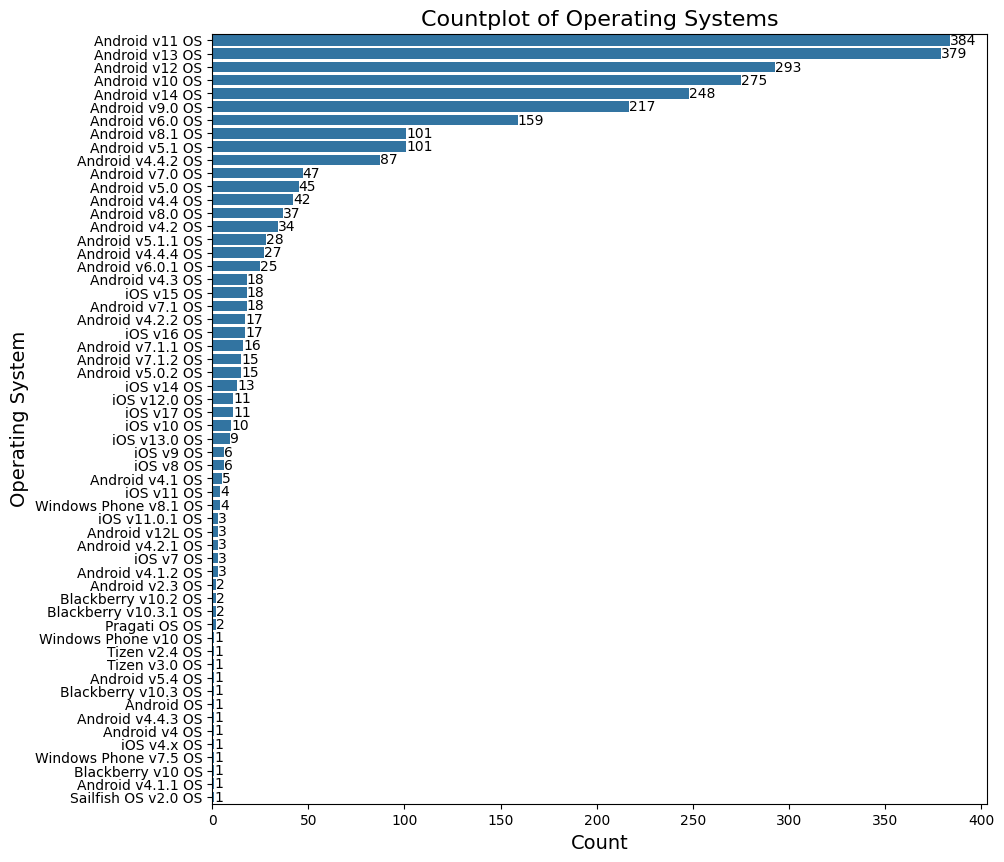

In [25]:
# This plot shows the trends that are noticed in operating systems of smartphones
plt.figure(figsize=(10,10))
ax = sns.countplot(df['operating_system'], order=df['operating_system'].value_counts().index)
abs_values = df['operating_system'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Operating System', fontsize = 14)
plt.title('Countplot of Operating Systems', fontsize=16)

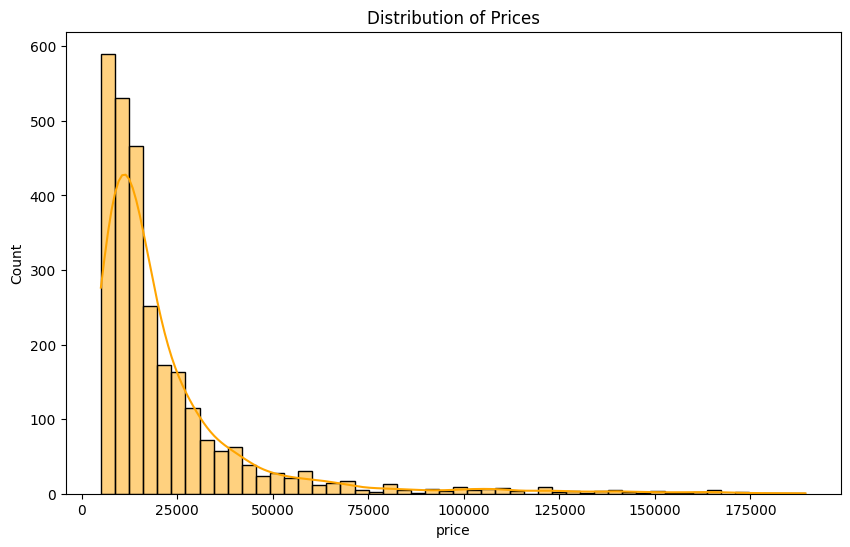

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color = 'orange')
plt.title('Distribution of Prices')
plt.show()
# Plot shows majority of smarphones in this dataset lie between 5000 - 25000. Please refer to next code line to review statistical figures

In [27]:
df['price'].describe()

,price
count,2778.000000
mean,22200.487041
std,23482.844677
min,5000.000000
25%,9160.750000
50%,14990.000000
75%,24999.000000
max,189400.000000


Text(0, 0.5, 'Count')

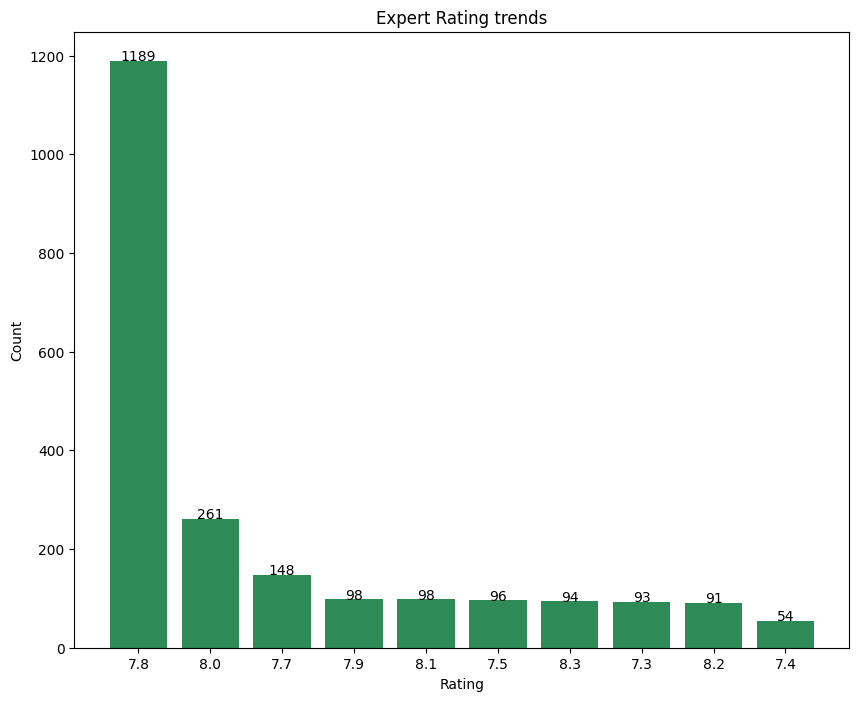

In [28]:
def addlabels(x_axis, y_axis):
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i] + 0.5, y_axis[i], ha='center')
pop_er = df["expert_rating"].value_counts().head(10)
x_axis_pop_er = pop_er.index.astype(str)
y_axis_pop_er = pop_er.values
plt.figure(figsize=(10,8))
plt.bar(x_axis_pop_er,y_axis_pop_er, color='seagreen')
addlabels(x_axis_pop_er, y_axis_pop_er)
plt.title('Expert Rating trends')
plt.xlabel('Rating')
plt.ylabel('Count')
# This plot describes the trends in top 10 Expert ratings. It shows count of values of each rating that has been observed in the data.

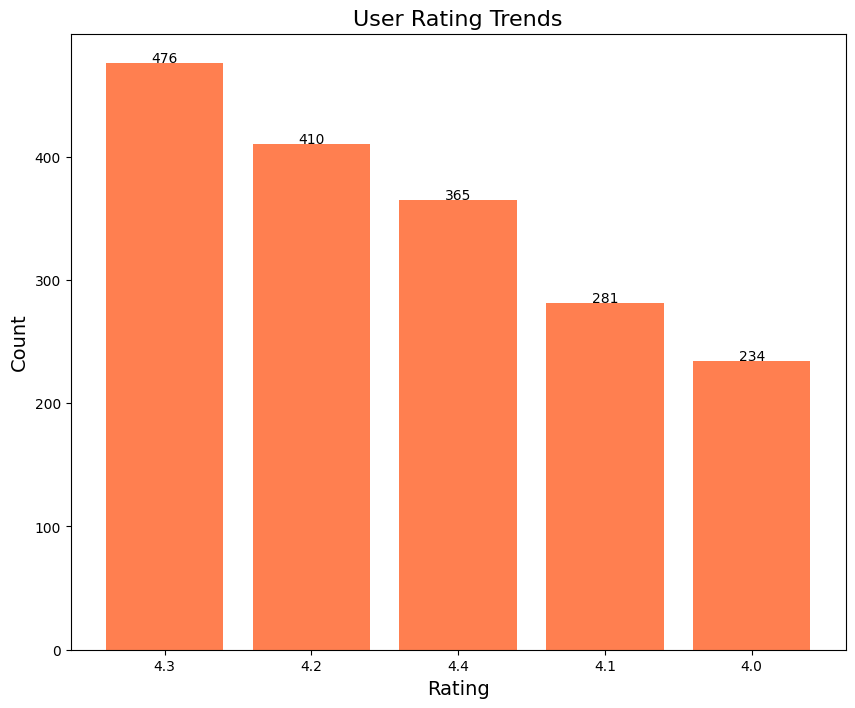

In [29]:
def addlabels(x_axis, y_axis):
    for i in range(len(x_axis)):
        plt.text(i, y_axis[i] + 0.5, y_axis[i], ha='center')
pop_ur = df["user_rating"].value_counts().head()
x_axis_pop_ur = pop_ur.index.astype(str)
y_axis_pop_ur = pop_ur.values
plt.figure(figsize=(10, 8))
plt.bar(x_axis_pop_ur, y_axis_pop_ur, color='coral')
addlabels(x_axis_pop_ur, y_axis_pop_ur)
plt.title('User Rating Trends', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()
# The plot describes the User Feedback. It shows the most recurring values along with their respective user count

### Bivariate Analysis

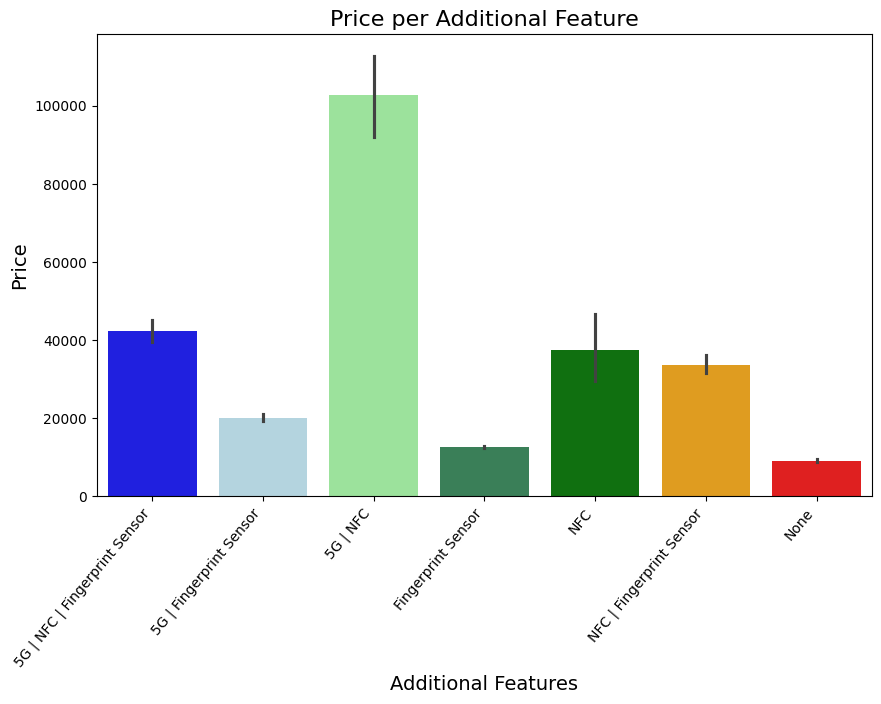

In [30]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'lightblue', 'lightgreen', 'seagreen', 'green', 'orange', 'red']
sns.barplot(x='additional_features', y='price', data=df, palette=colors)
plt.title('Price per Additional Feature', fontsize = 16)
plt.xlabel('Additional Features', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(rotation = 50, ha = 'right')
plt.show()
# The plot shows the impact of additional features on the pricing of smartphones.

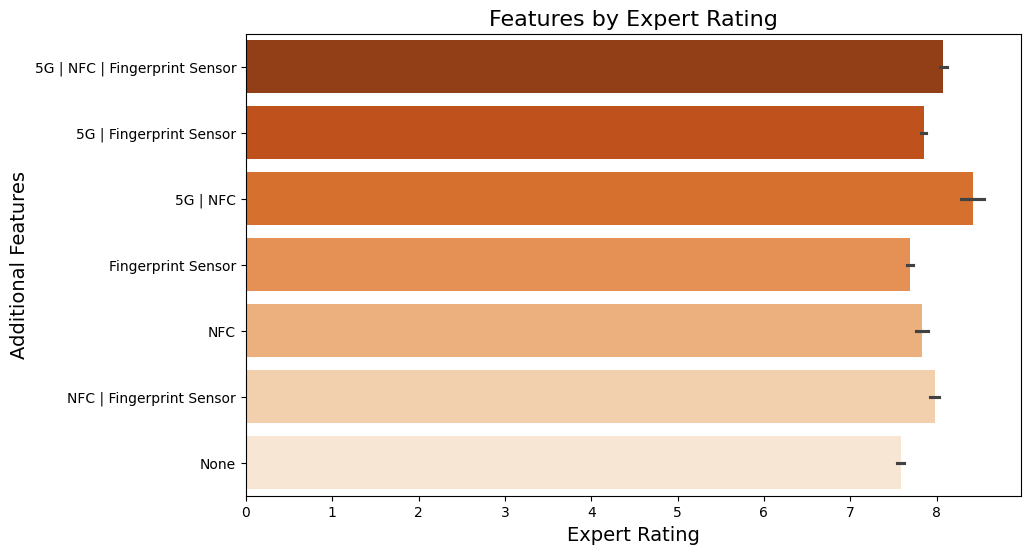

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='expert_rating', y='additional_features', data=df, palette='Oranges_r')
plt.title('Features by Expert Rating', fontsize=16)
plt.xlabel('Expert Rating', fontsize=14)
plt.ylabel('Additional Features', fontsize=14)
plt.show()
# The plot displays smartphones with additional features and the level of recommendation from experts.

Using Plotly Library

In [32]:
fig = px.scatter(
    df,
    x='user_rating',
    y='expert_rating',
    hover_data=['processor'],
    labels={'user_rating': 'User Rating', 'expert_rating': 'Expert Rating'},
    color = 'user_rating',
    color_continuous_scale='Viridis',
    title='Processor Comparison by User and Expert')
fig.show()
# The plot shows the Processors according to User Feedback and Expert recommendations

In [33]:
fig = px.bar(
    df,
    x='model_name',
    y='price',
    color='price',
    color_continuous_scale='Viridis',
    title='Price Against Phone Model')
fig.update_layout(
    xaxis_title='Phone Model',
    yaxis_title='Price',
    title_x=0.5)
fig.show()
# The plot shows pricing of different smartphone models

In [34]:
fig = px.line(
    df,
    x=df['operating_system'].index,
    y='operating_system',
    markers=True,
    title='Trend of Operating Systems')
fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Operating Systems')
fig.show()
# The plot shows operating systems with their frequency